In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
encoder = LabelEncoder()
for i in df.columns:
    df[i] = encoder.fit_transform(df[i])    

In [112]:
input = df.drop('CO2 Emissions(g/km)',axis=1)
target = df['CO2 Emissions(g/km)']

In [113]:
r2 = []
for i in range(11):
    pca = PCA(n_components=i+1)
    data = pca.fit_transform(input)
    reg = LinearRegression()
    reg.fit(data,target)
    r2.append(r2_score(target,reg.predict(data))*100)

(85.0, 93.0)

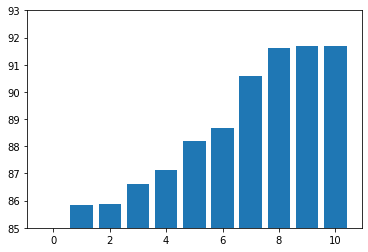

In [114]:
plt.bar(range(11),r2)
plt.ylim(85,93)

(85.0, 93.0)

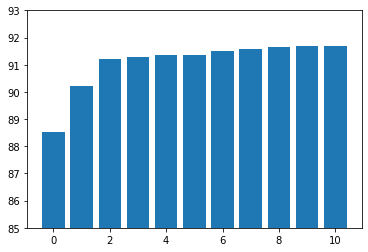

In [13]:
scaler = StandardScaler()
x = scaler.fit_transform(df)
data_std = pd.DataFrame(x)

i = data_std.drop(11,axis=1)
t = data_std[11]

r2_std = []
for j in range(11):
    pca = PCA(n_components=j+1)
    data = pca.fit_transform(i)
    reg = LinearRegression()
    reg.fit(data,t)
    r2_std.append(r2_score(t,reg.predict(data))*100)

plt.bar(range(11),r2_std)
plt.ylim(85,93)